# Unsupervised Machine Learning

## Distances

### Manhattan distance

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import csv to a dataframe, select only the 1st 12 rows (the rest we don't need)
df = pd.read_csv('../data/food_ratings - DS003.csv', index_col='student')
df = df.iloc[:12,:]
df

,broccoli,brussels_sprouts,hamburger,oysters (raw),onion (raw),peas,olives,blue_cheese,whisky,age,favorite_color
student,,,,,,,,,,,
Akbar,7.0,0.0,5,2,3.0,4.0,8.0,8.0,7.0,32.0,Blue
Andreas,7.0,7.0,7,2,6.0,2.0,3.0,5.0,6.0,34.0,Blue
Dónal,8.0,6.0,8,5,1.0,5.0,8.0,10.0,10.0,35.0,Brown
Hana,5.0,8.0,8,8,5.0,7.0,9.0,8.0,7.0,31.0,Green
Konstantinos,5.0,7.0,1,0,7.0,8.0,10.0,2.0,7.0,28.0,Blue
Kristina,9.0,8.0,5,0,7.0,7.0,9.0,4.0,7.0,36.0,red
Sabrina,6.0,8.0,10,0,8.0,8.0,10.0,0.0,2.0,30.0,black
Sandrine,10.0,2.0,8,0,5.0,8.0,10.0,10.0,0.0,41.0,Blue
Sevgi,6.0,2.0,9,0,5.0,7.0,10.0,0.0,0.0,38.0,Green


In [3]:
# drop age and favorite_color as right now we are seeing how similar our tastes in food are. These 2 columns are not relevant
df.drop(['age', 'favorite_color'], axis=1, inplace=True)
df

,broccoli,brussels_sprouts,hamburger,oysters (raw),onion (raw),peas,olives,blue_cheese,whisky
student,,,,,,,,,
Akbar,7.0,0.0,5,2,3.0,4.0,8.0,8.0,7.0
Andreas,7.0,7.0,7,2,6.0,2.0,3.0,5.0,6.0
Dónal,8.0,6.0,8,5,1.0,5.0,8.0,10.0,10.0
Hana,5.0,8.0,8,8,5.0,7.0,9.0,8.0,7.0
Konstantinos,5.0,7.0,1,0,7.0,8.0,10.0,2.0,7.0
Kristina,9.0,8.0,5,0,7.0,7.0,9.0,4.0,7.0
Sabrina,6.0,8.0,10,0,8.0,8.0,10.0,0.0,2.0
Sandrine,10.0,2.0,8,0,5.0,8.0,10.0,10.0,0.0
Sevgi,6.0,2.0,9,0,5.0,7.0,10.0,0.0,0.0


In [4]:
df.dtypes

broccoli            float64
brussels_sprouts    float64
hamburger            object
oysters (raw)        object
 onion (raw)        float64
peas                float64
olives              float64
blue_cheese         float64
whisky              float64
dtype: object

In [5]:
# we have a small corruption of our data, hamburger and oyster should be numbers, not objects, so we need to convert them
df['hamburger'] = pd.to_numeric(df['hamburger'])
df['oysters (raw)'] = pd.to_numeric(df['oysters (raw)'])

#### Example One: 2 students with 2 ratings

In [6]:
# select the 2 student and the 2 columns
sample = df.iloc[1:3,0:2]
sample

,broccoli,brussels_sprouts
student,,
Andreas,7.0,7.0
Dónal,8.0,6.0


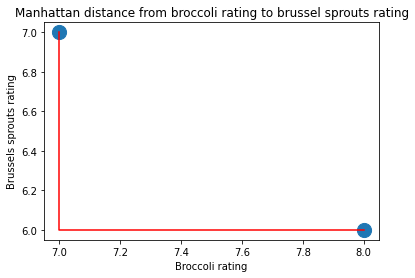

In [7]:
# plot the manhattan distance between two points
# plt.scatter(x, y, s = size(of dots on the chart))
plt.scatter(sample['broccoli'], sample['brussels_sprouts'], s=200)

# tracing a line of manhatten distance in red
y = [7, 6, 6]
x = [7, 7, 8]
plt.plot(x, y, c='r')

# labelling the chart
plt.title('Manhattan distance from broccoli rating to brussel sprouts rating')
plt.xlabel('Broccoli rating')
plt.ylabel('Brussels sprouts rating')
plt.show()

#### Example 2: 2 students with 3 ratings

In [8]:
# Select 2 students with 3 columns
sample = df.iloc[1:3, 0:3]
sample

,broccoli,brussels_sprouts,hamburger
student,,,
Andreas,7.0,7.0,7
Dónal,8.0,6.0,8


In [9]:
# distance user 1 and user 2 for broccoli
md_m1_users1to2 = abs(sample.iloc[0,0] - sample.iloc[1,0])
md_m1_users1to2

1.0

In [10]:
# distance user 1 and user 2 for brussel_sprouts
md_m2_users1to2 = abs(sample.iloc[0,1] - sample.iloc[1,1])
md_m2_users1to2

1.0

In [11]:
# distance user 1 and user 2 for hamburguer
md_m3_users1to2 = abs(sample.iloc[0,2] - sample.iloc[1,2])
md_m3_users1to2

1

In [12]:
# and now to calculate the distance between both users, it will be
md_users1to2 = md_m1_users1to2 + md_m2_users1to2 + md_m3_users1to2
md_users1to2

3.0

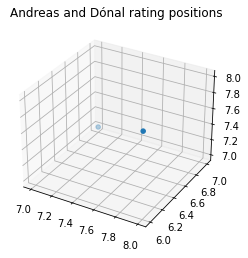

In [13]:
# how can we visualize that?
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.title('Andreas and Dónal rating positions')
ax.scatter(xs=sample['broccoli'], ys=sample['brussels_sprouts'], zs=sample['hamburger'])
plt.show()

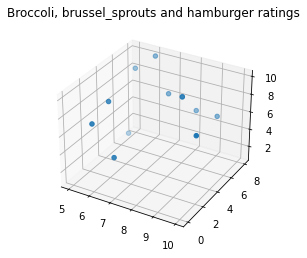

In [14]:
# 3d visualisation of all students for Broccoli, Brussel Sprouts, and Hamburgers
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.title('Broccoli, brussel_sprouts and hamburger ratings')
ax.scatter(xs=df['broccoli'], ys=df['brussels_sprouts'], zs=df['hamburger'])
plt.show()

#### Challenge 1: Calculate the Manhatten distance between all users for the 1st 3 rows. 

Automate this process using a for loop

##### Solution from Hana

In [15]:
# This solution requires a numerical index, not the student names like we have used so far
# We use .reset_index() to achieve this
food = df.reset_index()

for index, row in food.iterrows():
    for i in range((index + 1),12):

        # distance user 1 and user 2 for broccoli
        distance1 = abs(row.iloc[1] - food.iloc[i,1])
        distance2 = abs(row.iloc[2] - food.iloc[i,2])
        distance3 = abs(row.iloc[3] - food.iloc[i,3])
        total = distance1 + distance2 + distance3
        print(f"Distance for {row.iloc[0]} and {food.iloc[i].student} is {total}")

Distance for Akbar and Andreas is 9.0
Distance for Akbar and Dónal is 10.0
Distance for Akbar and Hana is 13.0
Distance for Akbar and Konstantinos is 13.0
Distance for Akbar and Kristina is 10.0
Distance for Akbar and Sabrina is 14.0
Distance for Akbar and Sandrine is 8.0
Distance for Akbar and Sevgi is 7.0
Distance for Akbar and Rias is 10.0
Distance for Akbar and Ben is 9.0
Distance for Akbar and Joan is 4.0
Distance for Andreas and Dónal is 3.0
Distance for Andreas and Hana is 4.0
Distance for Andreas and Konstantinos is 8.0
Distance for Andreas and Kristina is 5.0
Distance for Andreas and Sabrina is 5.0
Distance for Andreas and Sandrine is 9.0
Distance for Andreas and Sevgi is 8.0
Distance for Andreas and Rias is 3.0
Distance for Andreas and Ben is 4.0
Distance for Andreas and Joan is 9.0
Distance for Dónal and Hana is 5.0
Distance for Dónal and Konstantinos is 11.0
Distance for Dónal and Kristina is 6.0
Distance for Dónal and Sabrina is 6.0
Distance for Dónal and Sandrine is 6.0
D

##### Solution from Dònal

In [16]:
results = {
    'comparison': [],
    'Manhattan_distance': []
}
for i in range(len(sample.index)):
    for j in range(i, len(sample.index)):
        if i != j:
            results['comparison'].append(sample.iloc[i].name+' vs '+sample.iloc[j].name)
            results['Manhattan_distance'].append(sum(abs(sample.iloc[i] - sample.iloc[j])))
            
results = pd.DataFrame(results).set_index('comparison')
results
sample = df.iloc[0:,0:3]
results = {
    'comparison': [],
    'Manhattan_distance': []
}
for i in range(len(sample.index)):
    for j in range(i, len(sample.index)):
        if i != j:
            results['comparison'].append(sample.iloc[i].name+' vs '+sample.iloc[j].name)
            results['Manhattan_distance'].append(sum(abs(sample.iloc[i] - sample.iloc[j])))
            
results = pd.DataFrame(results).set_index('comparison')
results

,Manhattan_distance
comparison,
Akbar vs Andreas,9.0
Akbar vs Dónal,10.0
Akbar vs Hana,13.0
Akbar vs Konstantinos,13.0
Akbar vs Kristina,10.0
...,...
Sevgi vs Ben,12.0
Sevgi vs Joan,3.0
Rias vs Ben,5.0


##### Solution from WBS

In [17]:
all_distances = []

for student in df.index: 
    
    # get the rating for the first three columns 
    broccoli = df.loc[student][0]
    brussel_sprouts = df.loc[student][1]
    hamburguer = df.loc[student][2]

    print(f'{student} ratings for broccoli: {broccoli}, brussel_sprouts: {brussel_sprouts} and hamburger {hamburguer}')
    
    student_distance = []

    # now compare its ratings with everyone else: 
    for student_to_compare in df.index:
        
        # get the ratings for the other students to compare
        broccoli_to_compare = df.loc[student_to_compare][0]
        brussel_sprouts_to_compare = df.loc[student_to_compare][1]
        hamburguer_to_compare = df.loc[student_to_compare][2]
        
        # look for the distances between both students
        broccoli_distance = abs(broccoli - broccoli_to_compare)
        brussel_sprouts_distance = abs(brussel_sprouts - brussel_sprouts_to_compare)
        hamburguer_distance = abs(hamburguer - hamburguer_to_compare)
        
        # add the distances between both students
        distance = broccoli_distance + brussel_sprouts_distance + hamburguer_distance
        
        print(f'The distance between {student} and {student_to_compare} is {distance}')
        
        # store the distance
        student_distance.append(distance)
        
    # the list of distances of an specific student
    print(f'The distances from {student} are {student_distance}')
    
    # store the student distances in all the students distances
    all_distances.append(student_distance)

Akbar ratings for broccoli: 7.0, brussel_sprouts: 0.0 and hamburger 5.0
The distance between Akbar and Akbar is 0.0
The distance between Akbar and Andreas is 9.0
The distance between Akbar and Dónal is 10.0
The distance between Akbar and Hana is 13.0
The distance between Akbar and Konstantinos is 13.0
The distance between Akbar and Kristina is 10.0
The distance between Akbar and Sabrina is 14.0
The distance between Akbar and Sandrine is 8.0
The distance between Akbar and Sevgi is 7.0
The distance between Akbar and Rias is 10.0
The distance between Akbar and Ben is 9.0
The distance between Akbar and Joan is 4.0
The distances from Akbar are [0.0, 9.0, 10.0, 13.0, 13.0, 10.0, 14.0, 8.0, 7.0, 10.0, 9.0, 4.0]
Andreas ratings for broccoli: 7.0, brussel_sprouts: 7.0 and hamburger 7.0
The distance between Andreas and Akbar is 9.0
The distance between Andreas and Andreas is 0.0
The distance between Andreas and Dónal is 3.0
The distance between Andreas and Hana is 4.0
The distance between Andrea

In [18]:
# Distances, 1 list per person
all_distances

[[0.0, 9.0, 10.0, 13.0, 13.0, 10.0, 14.0, 8.0, 7.0, 10.0, 9.0, 4.0],
 [9.0, 0.0, 3.0, 4.0, 8.0, 5.0, 5.0, 9.0, 8.0, 3.0, 4.0, 9.0],
 [10.0, 3.0, 0.0, 5.0, 11.0, 6.0, 6.0, 6.0, 7.0, 0.0, 5.0, 8.0],
 [13.0, 4.0, 5.0, 0.0, 8.0, 7.0, 3.0, 11.0, 8.0, 5.0, 6.0, 9.0],
 [13.0, 8.0, 11.0, 8.0, 0.0, 9.0, 11.0, 17.0, 14.0, 11.0, 8.0, 15.0],
 [10.0, 5.0, 6.0, 7.0, 9.0, 0.0, 8.0, 10.0, 13.0, 6.0, 1.0, 14.0],
 [14.0, 5.0, 6.0, 3.0, 11.0, 8.0, 0.0, 12.0, 7.0, 6.0, 7.0, 10.0],
 [8.0, 9.0, 6.0, 11.0, 17.0, 10.0, 12.0, 0.0, 5.0, 6.0, 11.0, 6.0],
 [7.0, 8.0, 7.0, 8.0, 14.0, 13.0, 7.0, 5.0, 0.0, 7.0, 12.0, 3.0],
 [10.0, 3.0, 0.0, 5.0, 11.0, 6.0, 6.0, 6.0, 7.0, 0.0, 5.0, 8.0],
 [9.0, 4.0, 5.0, 6.0, 8.0, 1.0, 7.0, 11.0, 12.0, 5.0, 0.0, 13.0],
 [4.0, 9.0, 8.0, 9.0, 15.0, 14.0, 10.0, 6.0, 3.0, 8.0, 13.0, 0.0]]

#### Making a pivot table to make comparisons easier to see

In [19]:
# adding the column names to understand the table
print('Distances between students only looking at broccoli, brussel sprouts and hamburgers:')
# Create a dataframe from the results
student_manhattan_distance = pd.DataFrame(all_distances)
# Label the columns using the names in our original dataframe (df)
student_manhattan_distance.columns = df.index
# Label the rows using the names in our original dataframe (df)
student_manhattan_distance.index = df.index

student_manhattan_distance

Distances between students only looking at broccoli, brussel sprouts and hamburgers:


student,Akbar,Andreas,Dónal,Hana,Konstantinos,Kristina,Sabrina,Sandrine,Sevgi,Rias,Ben,Joan
student,,,,,,,,,,,,
Akbar,0.0,9.0,10.0,13.0,13.0,10.0,14.0,8.0,7.0,10.0,9.0,4.0
Andreas,9.0,0.0,3.0,4.0,8.0,5.0,5.0,9.0,8.0,3.0,4.0,9.0
Dónal,10.0,3.0,0.0,5.0,11.0,6.0,6.0,6.0,7.0,0.0,5.0,8.0
Hana,13.0,4.0,5.0,0.0,8.0,7.0,3.0,11.0,8.0,5.0,6.0,9.0
Konstantinos,13.0,8.0,11.0,8.0,0.0,9.0,11.0,17.0,14.0,11.0,8.0,15.0
Kristina,10.0,5.0,6.0,7.0,9.0,0.0,8.0,10.0,13.0,6.0,1.0,14.0
Sabrina,14.0,5.0,6.0,3.0,11.0,8.0,0.0,12.0,7.0,6.0,7.0,10.0
Sandrine,8.0,9.0,6.0,11.0,17.0,10.0,12.0,0.0,5.0,6.0,11.0,6.0
Sevgi,7.0,8.0,7.0,8.0,14.0,13.0,7.0,5.0,0.0,7.0,12.0,3.0


Now we can make this pivot table into a heatmap, this makes it easier to read

<AxesSubplot:xlabel='student', ylabel='student'>

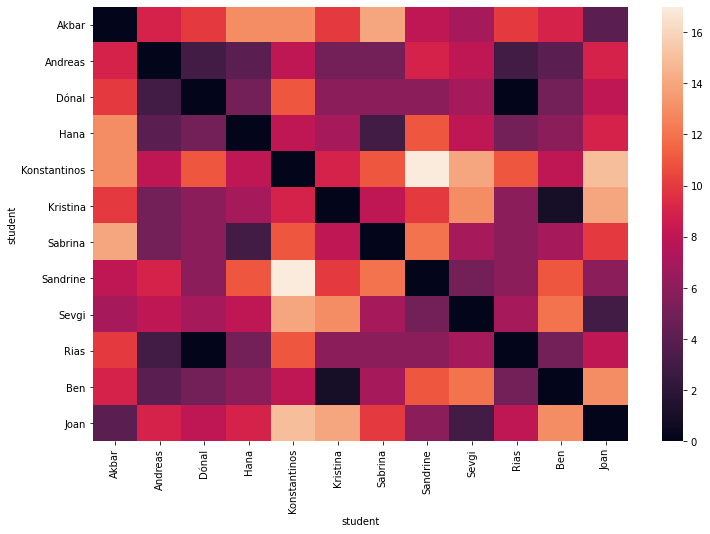

In [20]:
import seaborn as sns
plt.subplots(figsize=(12,8))
sns.heatmap(student_manhattan_distance)

#### A method for writing shorter for loops

In [21]:
temp_list = [1,2,3,4]

In [22]:
# This is how we would normally write a for loop
temp_list_plus_1 = []
for num in temp_list:
    temp_list_plus_1.append(num + 1)
temp_list_plus_1

[2, 3, 4, 5]

In [23]:
# This is a more succint way of writing the same loop
[num + 1 for num in temp_list]

[2, 3, 4, 5]

### Euclidean distance: 

$$d = \sqrt {\left( {x_1 - x_2 } \right)^2 + \left( {y_1 - y_2 } \right)^2 }$$

#### Example One: 2 students with 2 ratings

In [24]:
sample = df.iloc[1:3,0:2]

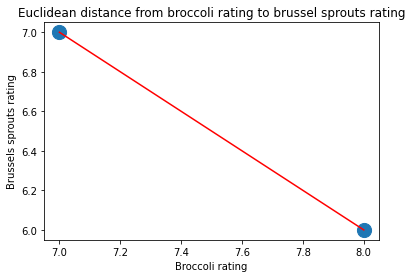

In [25]:
# plot the euclidean distance between two points
# plot rattings
plt.scatter(sample['broccoli'], sample['brussels_sprouts'], s=200)

# trace the euclidean distance as a red line
y = [7, 6]
x = [7, 8]
plt.plot(x, y, c='r')

# label the plot
# plt.xlim(-1, 11)
# plt.ylim(-1, 11)
plt.title('Euclidean distance from broccoli rating to brussel sprouts rating')
plt.xlabel('Broccoli rating')
plt.ylabel('Brussels sprouts rating')
plt.show()

#### Challenge 2: Calculate the Euclidean distance between all users

try to use the shorthand for loop, which we learnt above, if possible

##### Solution from Dònal

for the 1st 3 columns of the df

,Euclidean_distance
comparison,
Akbar vs Andreas,7.280110
Akbar vs Dónal,6.782330
Akbar vs Hana,8.774964
Akbar vs Konstantinos,8.306624
Akbar vs Kristina,8.246211
...,...
Joan vs Sabrina,8.246211
Joan vs Sandrine,4.472136
Joan vs Sevgi,2.236068


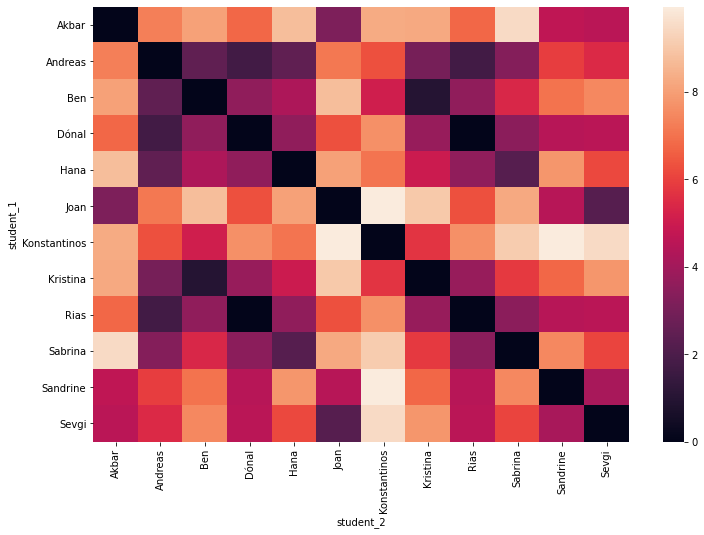

In [26]:
import math

sample = df.iloc[0:,0:3]
heatmap_results = {
    'student_1': [],
    'student_2': [],
    'Euclidean_distance': []
}
results = {
    'comparison': [],
    'Euclidean_distance': []
}

for i in range(len(sample.index)):
    for j in range(len(sample.index)):
        heatmap_results['student_1'].append(sample.iloc[i].name)
        heatmap_results['student_2'].append(sample.iloc[j].name)
        heatmap_results['Euclidean_distance'].append(math.sqrt(sum((sample.iloc[i] - sample.iloc[j])**2)))
        
        if i != j:
            results['comparison'].append(sample.iloc[i].name+' vs '+sample.iloc[j].name)
            results['Euclidean_distance'].append(math.sqrt(sum((sample.iloc[i] - sample.iloc[j])**2)))
            
student_Euclidean_distance = pd.DataFrame(heatmap_results)
student_Euclidean_distance_pivot_table = pd.pivot_table(student_Euclidean_distance, 
                                                        values='Euclidean_distance', 
                                                        index='student_1',
                                                        columns='student_2')
plt.subplots(figsize=(12,8))
sns.heatmap(student_Euclidean_distance_pivot_table)

results = pd.DataFrame(results).set_index('comparison')
results

##### Solution from WBS

covers all columns (not just 1st 3)

<AxesSubplot:xlabel='student', ylabel='student'>

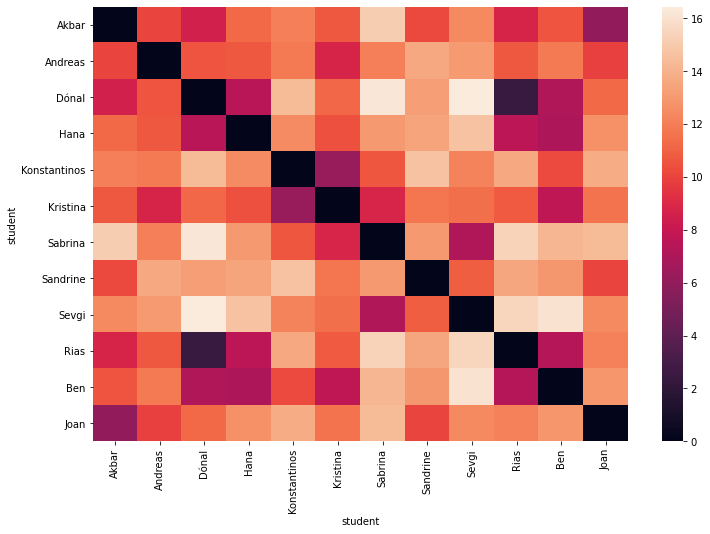

In [27]:
from math import sqrt
all_distances = []

for student in df.index: 

    ratings = [rating for rating in df.loc[student]]
    student_distances = []
    
    for student_to_compare in df.index: 
        ratings_to_compare = [rating_to_compare for rating_to_compare in df.loc[student_to_compare]]
        # euclidean distance formula
        distance = sqrt(sum([(ratings[pos] - ratings_to_compare[pos])**2 for pos in range(len(ratings))]))
        student_distances.append(distance)
    
    all_distances.append(student_distances)

st_euclidean_distances = pd.DataFrame(all_distances, columns =  df.index, index =  df.index)
plt.subplots(figsize=(12, 8))
sns.heatmap(st_euclidean_distances)

##### Solution from Rias

for 1st 3 columns only

In [28]:
import numpy as np

all_distances = []

for student in df.index: 
    
    # get the rating for the first three columns 
    broccoli = df.loc[student][0]
    brussel_sprouts = df.loc[student][1]
    hamburguer = df.loc[student][2]

    print(f'{student} ratings for broccoli: {broccoli}, brussel_sprouts: {brussel_sprouts} and hamburger {hamburguer}')
    
    student_distance = []

    # now compare its ratings with everyone else: 
    for student_to_compare in df.index:
        
        # get the ratings for the other students to compare
        broccoli_to_compare = df.loc[student_to_compare][0]
        brussel_sprouts_to_compare = df.loc[student_to_compare][1]
        hamburguer_to_compare = df.loc[student_to_compare][2]
        
        # look for the distances between both students
        b_dist = broccoli - broccoli_to_compare
        b_s_dist = brussel_sprouts - brussel_sprouts_to_compare
        h_dist = hamburguer - hamburguer_to_compare
        
        # summarise distance between both students
        sum_sq = np.sum(np.square(b_dist) + np.square(b_s_dist) + np.square(h_dist))
        distance = np.sqrt(sum_sq)
        
        print(f'The distance between {student} and {student_to_compare} is {distance}')
        
        # store the distance
        student_distance.append(distance)
        
    # the list of distances of an specific student
    print(f'The distances from {student} are {student_distance}')
    
    # store the student distances in all the students distances
    all_distances.append(student_distance)

Akbar ratings for broccoli: 7.0, brussel_sprouts: 0.0 and hamburger 5.0
The distance between Akbar and Akbar is 0.0
The distance between Akbar and Andreas is 7.280109889280518
The distance between Akbar and Dónal is 6.782329983125268
The distance between Akbar and Hana is 8.774964387392123
The distance between Akbar and Konstantinos is 8.306623862918075
The distance between Akbar and Kristina is 8.246211251235321
The distance between Akbar and Sabrina is 9.486832980505138
The distance between Akbar and Sandrine is 4.69041575982343
The distance between Akbar and Sevgi is 4.58257569495584
The distance between Akbar and Rias is 6.782329983125268
The distance between Akbar and Ben is 8.06225774829855
The distance between Akbar and Joan is 3.1622776601683795
The distances from Akbar are [0.0, 7.280109889280518, 6.782329983125268, 8.774964387392123, 8.306623862918075, 8.246211251235321, 9.486832980505138, 4.69041575982343, 4.58257569495584, 6.782329983125268, 8.06225774829855, 3.162277660168

### Function to calculate Euclidean or Manhatten

In [29]:
# create a function that given a dataset, returns its distances in a dataframe
def distance_df(data, dist_type='euclidean'):
    """
    Given a dataframe, return the distance between all the indexes. 
    We assume the indexes represents the users/students. 
    Args: 
        * dataset 
        * distance type to perform the operation (euclidean or manhattan)
    """
    from math import sqrt
    all_distances = []
    error = False
    
    for student in data.index: 

        ratings = [rating for rating in data.loc[student]]
        student_distances = []

        for student_to_compare in data.index: 
            ratings_to_compare = [rating_to_compare for rating_to_compare in data.loc[student_to_compare]]

            if dist_type == 'euclidean':
                distance = sqrt(sum([(ratings[pos] - ratings_to_compare[pos])**2 for pos in range(len(ratings))]))
            elif dist_type == 'manhattan':
                distance = sum([abs(ratings[pos] - ratings_to_compare[pos]) for pos in range(len(ratings))])
            else: 
                print('Wrong distance type. Please choose between "manhattan" or "euclidean" distance.')
                error = True
                break
                
            student_distances.append(distance)
            
        if error: break
        
        all_distances.append(student_distances)
        
    if error is False: 
        st_euclidean_distances = pd.DataFrame(all_distances)
        st_euclidean_distances.columns = df.index
        st_euclidean_distances.index = df.index
        return st_euclidean_distances

## Data Scaling

### Min Max Scaling

To normalise the column Broccoli. We take both the maximum and minimum values of the column. The Maximum becomes 1, the minimum 0, and all the other values get scaled accordingly.

$$
x' = \frac{x - min(x)}{max(x) - min(x)}
$$

In [30]:
# We will reread our csv file, we want to include the age column to help exemplify scaling
# These steps are exactly what we did at the top of this notebook (except we're not dropping the column age)
df = pd.read_csv('../data/food_ratings - DS003.csv', index_col='student')
df = df.iloc[:12,:]
df.drop(['favorite_color'], axis=1, inplace=True)
df['oysters (raw)'] = pd.to_numeric(df['oysters (raw)'])
df['hamburger'] = pd.to_numeric(df['hamburger'])
df

,broccoli,brussels_sprouts,hamburger,oysters (raw),onion (raw),peas,olives,blue_cheese,whisky,age
student,,,,,,,,,,
Akbar,7.0,0.0,5,2,3.0,4.0,8.0,8.0,7.0,32.0
Andreas,7.0,7.0,7,2,6.0,2.0,3.0,5.0,6.0,34.0
Dónal,8.0,6.0,8,5,1.0,5.0,8.0,10.0,10.0,35.0
Hana,5.0,8.0,8,8,5.0,7.0,9.0,8.0,7.0,31.0
Konstantinos,5.0,7.0,1,0,7.0,8.0,10.0,2.0,7.0,28.0
Kristina,9.0,8.0,5,0,7.0,7.0,9.0,4.0,7.0,36.0
Sabrina,6.0,8.0,10,0,8.0,8.0,10.0,0.0,2.0,30.0
Sandrine,10.0,2.0,8,0,5.0,8.0,10.0,10.0,0.0,41.0
Sevgi,6.0,2.0,9,0,5.0,7.0,10.0,0.0,0.0,38.0


In [31]:
# This is a simple function will min max scale our data
def min_max_scaling(col):
    min_col = min(col)
    max_col = max(col)
    norm_val = []
    for val in col:
        norm_val.append((val - min_col) / (max_col - min_col))
    return norm_val

In [32]:
# Make a dataframe containing the columns original values plus the new min_max values
pd.DataFrame({
    'original': df.iloc[:,0],
    'min_max_scaling': min_max_scaling(df.iloc[:,0])
})

,original,min_max_scaling
student,,
Akbar,7.0,0.4
Andreas,7.0,0.4
Dónal,8.0,0.6
Hana,5.0,0.0
Konstantinos,5.0,0.0
Kristina,9.0,0.8
Sabrina,6.0,0.2
Sandrine,10.0,1.0
Sevgi,6.0,0.2


In [33]:
# Min max scale all the columns on a dataset
df_norm = df.apply(min_max_scaling, axis=0).copy()
df_norm

,broccoli,brussels_sprouts,hamburger,oysters (raw),onion (raw),peas,olives,blue_cheese,whisky,age
student,,,,,,,,,,
Akbar,0.4,0.000,0.444444,0.250,0.375,0.285714,0.714286,0.8,0.7,0.066667
Andreas,0.4,0.875,0.666667,0.250,0.750,0.000000,0.000000,0.5,0.6,0.100000
Dónal,0.6,0.750,0.777778,0.625,0.125,0.428571,0.714286,1.0,1.0,0.116667
Hana,0.0,1.000,0.777778,1.000,0.625,0.714286,0.857143,0.8,0.7,0.050000
Konstantinos,0.0,0.875,0.000000,0.000,0.875,0.857143,1.000000,0.2,0.7,0.000000
Kristina,0.8,1.000,0.444444,0.000,0.875,0.714286,0.857143,0.4,0.7,0.133333
Sabrina,0.2,1.000,1.000000,0.000,1.000,0.857143,1.000000,0.0,0.2,0.033333
Sandrine,1.0,0.250,0.777778,0.000,0.625,0.857143,1.000000,1.0,0.0,0.216667
Sevgi,0.2,0.250,0.888889,0.000,0.625,0.714286,1.000000,0.0,0.0,0.166667


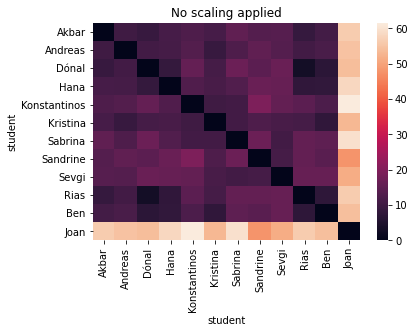

In [34]:
# Heatmap showing the impact of one person having a significantly different age
# No scaling applied
sns.heatmap(distance_df(df))
plt.title('No scaling applied')
plt.show()

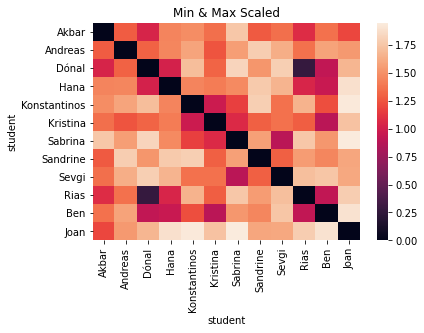

In [35]:
# Heatmap when all values have been scaled
sns.heatmap(distance_df(df_norm))
plt.title('Min & Max Scaled')
plt.show()

### Range Scaling

When we normalise the ratings, we are normalising the values between the minimum and maximum of each column, which should be 0 and 10. 
But, what happens when no one has given a rate of 0 or 10 to a food?

With min/max scaling the minumum and maximum of a column determine the range of that column. This can sometimes lead to obscure results in data. For example, if the lowest score for broccolli was an 8 and the highest was a 9, when we min/max scale broccoli, the 8 will become a 0, and the 9 will become a 1. The 0 and 1 will lead us to believe that these scores were very different, when in reality they were quite similar. In cases where it is appropriate, we can determine the range of our scaling: we can choose 1-10, 1-100, or even 7-99 if we should wish

#### Challenge 3: Apply range scaling to the data

##### Solution from WBS

In [36]:
# Create a function to scale the date
def range_scaling(col):
    min_col = 0
    max_col = 10
    norm_val = []
    for val in col:
        norm_val.append((val - min_col) / (max_col - min_col))
    return norm_val

In [37]:
# Create a small df to exemplify how the function works
pd.DataFrame({
    'original': df.iloc[:,0],
    'range_scaling': range_scaling(df.iloc[0:,0])
})

,original,range_scaling
student,,
Akbar,7.0,0.7
Andreas,7.0,0.7
Dónal,8.0,0.8
Hana,5.0,0.5
Konstantinos,5.0,0.5
Kristina,9.0,0.9
Sabrina,6.0,0.6
Sandrine,10.0,1.0
Sevgi,6.0,0.6


In [38]:
## We have not range scaled our age column because it can be argued where the maximum value of this range should lie.
## We therefore min max scaled the age column to keep things easy

# Scale the df using our function
df_scaled = df.drop('age', axis=1).apply(range_scaling).copy()
df_scaled['age'] = min_max_scaling(df['age'])
df_scaled

,broccoli,brussels_sprouts,hamburger,oysters (raw),onion (raw),peas,olives,blue_cheese,whisky,age
student,,,,,,,,,,
Akbar,0.7,0.0,0.5,0.2,0.3,0.4,0.8,0.8,0.7,0.066667
Andreas,0.7,0.7,0.7,0.2,0.6,0.2,0.3,0.5,0.6,0.100000
Dónal,0.8,0.6,0.8,0.5,0.1,0.5,0.8,1.0,1.0,0.116667
Hana,0.5,0.8,0.8,0.8,0.5,0.7,0.9,0.8,0.7,0.050000
Konstantinos,0.5,0.7,0.1,0.0,0.7,0.8,1.0,0.2,0.7,0.000000
Kristina,0.9,0.8,0.5,0.0,0.7,0.7,0.9,0.4,0.7,0.133333
Sabrina,0.6,0.8,1.0,0.0,0.8,0.8,1.0,0.0,0.2,0.033333
Sandrine,1.0,0.2,0.8,0.0,0.5,0.8,1.0,1.0,0.0,0.216667
Sevgi,0.6,0.2,0.9,0.0,0.5,0.7,1.0,0.0,0.0,0.166667


##### Solution from Dònal

In [39]:
df_1 = df.copy()
df_1 = df_1/df_1.max()
df_1

df_2 = df.copy()
df_2 = (df_2-df_2.min())/(df_2.max()-df_2.min())
df_2

,broccoli,brussels_sprouts,hamburger,oysters (raw),onion (raw),peas,olives,blue_cheese,whisky,age
student,,,,,,,,,,
Akbar,0.4,0.000,0.444444,0.250,0.375,0.285714,0.714286,0.8,0.7,0.066667
Andreas,0.4,0.875,0.666667,0.250,0.750,0.000000,0.000000,0.5,0.6,0.100000
Dónal,0.6,0.750,0.777778,0.625,0.125,0.428571,0.714286,1.0,1.0,0.116667
Hana,0.0,1.000,0.777778,1.000,0.625,0.714286,0.857143,0.8,0.7,0.050000
Konstantinos,0.0,0.875,0.000000,0.000,0.875,0.857143,1.000000,0.2,0.7,0.000000
Kristina,0.8,1.000,0.444444,0.000,0.875,0.714286,0.857143,0.4,0.7,0.133333
Sabrina,0.2,1.000,1.000000,0.000,1.000,0.857143,1.000000,0.0,0.2,0.033333
Sandrine,1.0,0.250,0.777778,0.000,0.625,0.857143,1.000000,1.0,0.0,0.216667
Sevgi,0.2,0.250,0.888889,0.000,0.625,0.714286,1.000000,0.0,0.0,0.166667
